In [2]:
import tensorflow as tf
from tensorflow.keras import layers,activations,losses,models,backend
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
 
print(tf.__version__)

2.5.0


In [22]:
data = pd.DataFrame()
data = pd.read_csv('C:/Users/hp/Desktop/data.csv')

In [23]:
data.dropna(axis=1, inplace=True)

In [24]:
data.drop(labels='id',axis=1,inplace=True)

In [25]:
data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [26]:
values = data.drop(labels='diagnosis',axis=1)
targets = data.diagnosis

In [27]:
x_train,x_test,y_train,y_test = train_test_split(values,targets,test_size=0.2)

In [28]:
encoder = LabelEncoder()
encoder.fit(y_train)
y_encoded_train = encoder.fit_transform(y_train)
y_encoded_test = encoder.fit_transform(y_test)

In [29]:
x_train.shape[1]

30

In [30]:
def create_model(layers,activation):
  model = models.Sequential()
  for i,nodes in enumerate(layers):
    print(nodes)
    if i==0:
      pass
      model.add(Dense(nodes, input_shape=[x_train.shape[1]], activation=activation))
    else:
      model.add(Dense(nodes, activation=activation))

  model.add(Dense(1))
  model.compile(optimizer='adam', loss=losses.binary_crossentropy, metrics=['accuracy'])
  return model

model = KerasClassifier(build_fn=create_model)

In [31]:
layers = [[20],[64],[64,32],[64,64],[64,32,32],[64,64,32]]
activations = ['relu', 'sigmoid']
param_grid = dict(layers=layers,activation=activations,epochs=[30], batch_size=[50,20,100])

grid = GridSearchCV(estimator=model, param_grid=param_grid)

In [32]:
grid.fit(x_train,y_train)

20
Epoch 1/30
8/8 [==============================] - 1s 3ms/step - loss: 9.5098 - accuracy: 0.3764
Epoch 2/30
8/8 [==============================] - 0s 3ms/step - loss: 9.5098 - accuracy: 0.3764
Epoch 3/30
8/8 [==============================] - 0s 4ms/step - loss: 9.5098 - accuracy: 0.3764
Epoch 4/30
8/8 [==============================] - 0s 3ms/step - loss: 9.5098 - accuracy: 0.3764
Epoch 5/30
8/8 [==============================] - 0s 3ms/step - loss: 9.5098 - accuracy: 0.3764
Epoch 6/30
8/8 [==============================] - 0s 3ms/step - loss: 9.5098 - accuracy: 0.3764
Epoch 7/30
8/8 [==============================] - 0s 4ms/step - loss: 9.5098 - accuracy: 0.3764
Epoch 8/30
8/8 [==============================] - 0s 4ms/step - loss: 9.5098 - accuracy: 0.3764
Epoch 9/30
8/8 [==============================] - 0s 4ms/step - loss: 9.5098 - accuracy: 0.3764
Epoch 10/30
8/8 [==============================] - 0s 5ms/step - loss: 9.5098 - accuracy: 0.3764
Epoch 11/30
8/8 [===================

8/8 [==============================] - 0s 5ms/step - loss: 5.5089 - accuracy: 0.6429
Epoch 24/30
8/8 [==============================] - 0s 3ms/step - loss: 5.5089 - accuracy: 0.6429
Epoch 25/30
8/8 [==============================] - 0s 3ms/step - loss: 5.5089 - accuracy: 0.6429
Epoch 26/30
8/8 [==============================] - 0s 3ms/step - loss: 5.5089 - accuracy: 0.6429
Epoch 27/30
8/8 [==============================] - 0s 4ms/step - loss: 5.5089 - accuracy: 0.6429
Epoch 28/30
8/8 [==============================] - 0s 3ms/step - loss: 5.5089 - accuracy: 0.6429
Epoch 29/30
8/8 [==============================] - 0s 4ms/step - loss: 5.5089 - accuracy: 0.6429
Epoch 30/30
2/2 [==============================] - 0s 7ms/step - loss: 6.6182 - accuracy: 0.5714
20
Epoch 1/30
8/8 [==============================] - 1s 3ms/step - loss: 9.5936 - accuracy: 0.3709
Epoch 2/30
8/8 [==============================] - 0s 3ms/step - loss: 9.5936 - accuracy: 0.3709
Epoch 3/30
8/8 [=========================

8/8 [==============================] - 0s 4ms/step - loss: 5.8055 - accuracy: 0.6236
Epoch 7/30
8/8 [==============================] - 0s 3ms/step - loss: 5.8055 - accuracy: 0.6236
Epoch 8/30
8/8 [==============================] - 0s 3ms/step - loss: 5.8055 - accuracy: 0.6236
Epoch 9/30
8/8 [==============================] - 0s 3ms/step - loss: 5.8055 - accuracy: 0.6236
Epoch 10/30
8/8 [==============================] - 0s 3ms/step - loss: 5.8055 - accuracy: 0.6236
Epoch 11/30
8/8 [==============================] - 0s 5ms/step - loss: 5.8055 - accuracy: 0.6236
Epoch 12/30
8/8 [==============================] - 0s 3ms/step - loss: 5.8055 - accuracy: 0.6236
Epoch 13/30
8/8 [==============================] - 0s 3ms/step - loss: 5.8055 - accuracy: 0.6236
Epoch 14/30
8/8 [==============================] - 0s 4ms/step - loss: 5.8055 - accuracy: 0.6236
Epoch 15/30
8/8 [==============================] - 0s 2ms/step - loss: 5.8055 - accuracy: 0.6236
Epoch 16/30
8/8 [============================

8/8 [==============================] - 0s 4ms/step - loss: 5.5089 - accuracy: 0.6429
Epoch 22/30
8/8 [==============================] - 0s 4ms/step - loss: 5.5089 - accuracy: 0.6429
Epoch 23/30
8/8 [==============================] - 0s 4ms/step - loss: 5.5089 - accuracy: 0.6429
Epoch 24/30
8/8 [==============================] - 0s 3ms/step - loss: 5.5089 - accuracy: 0.6429
Epoch 25/30
8/8 [==============================] - 0s 4ms/step - loss: 5.5089 - accuracy: 0.6429
Epoch 26/30
8/8 [==============================] - 0s 4ms/step - loss: 5.5089 - accuracy: 0.6429
Epoch 27/30
8/8 [==============================] - 0s 3ms/step - loss: 5.5089 - accuracy: 0.6429
Epoch 28/30
8/8 [==============================] - 0s 3ms/step - loss: 5.5089 - accuracy: 0.6429
Epoch 29/30
8/8 [==============================] - 0s 3ms/step - loss: 5.5089 - accuracy: 0.6429
Epoch 30/30
2/2 [==============================] - 0s 6ms/step - loss: 6.6107 - accuracy: 0.5714
64
Epoch 1/30
8/8 [=======================

8/8 [==============================] - 0s 3ms/step - loss: 5.8055 - accuracy: 0.6236
Epoch 14/30
8/8 [==============================] - 0s 3ms/step - loss: 5.8055 - accuracy: 0.6236
Epoch 15/30
8/8 [==============================] - 0s 3ms/step - loss: 5.8055 - accuracy: 0.6236
Epoch 16/30
8/8 [==============================] - 0s 3ms/step - loss: 5.8055 - accuracy: 0.6236
Epoch 17/30
8/8 [==============================] - 0s 3ms/step - loss: 5.8055 - accuracy: 0.6236
Epoch 18/30
8/8 [==============================] - 0s 3ms/step - loss: 5.8055 - accuracy: 0.6236
Epoch 19/30
8/8 [==============================] - 0s 3ms/step - loss: 5.8055 - accuracy: 0.6236
Epoch 20/30
8/8 [==============================] - 0s 4ms/step - loss: 5.8055 - accuracy: 0.6236
Epoch 21/30
8/8 [==============================] - 0s 3ms/step - loss: 5.8055 - accuracy: 0.6236
Epoch 22/30
8/8 [==============================] - 0s 3ms/step - loss: 5.8055 - accuracy: 0.6236
Epoch 23/30
8/8 [=========================

8/8 [==============================] - 0s 3ms/step - loss: 9.5936 - accuracy: 0.3709
Epoch 6/30
8/8 [==============================] - 0s 3ms/step - loss: 9.5936 - accuracy: 0.3709
Epoch 7/30
8/8 [==============================] - 0s 3ms/step - loss: 9.5936 - accuracy: 0.3709
Epoch 8/30
8/8 [==============================] - 0s 3ms/step - loss: 9.5936 - accuracy: 0.3709
Epoch 9/30
8/8 [==============================] - 0s 3ms/step - loss: 9.5936 - accuracy: 0.3709
Epoch 10/30
8/8 [==============================] - 0s 3ms/step - loss: 9.5936 - accuracy: 0.3709
Epoch 11/30
8/8 [==============================] - 0s 4ms/step - loss: 9.5936 - accuracy: 0.3709
Epoch 12/30
8/8 [==============================] - 0s 3ms/step - loss: 9.5936 - accuracy: 0.3709
Epoch 13/30
8/8 [==============================] - 0s 3ms/step - loss: 9.5936 - accuracy: 0.3709
Epoch 14/30
8/8 [==============================] - 0s 4ms/step - loss: 9.5936 - accuracy: 0.3709
Epoch 15/30
8/8 [=============================

8/8 [==============================] - 0s 3ms/step - loss: 9.5098 - accuracy: 0.3764
Epoch 28/30
8/8 [==============================] - 0s 3ms/step - loss: 9.5098 - accuracy: 0.3764
Epoch 29/30
8/8 [==============================] - 0s 3ms/step - loss: 9.5098 - accuracy: 0.3764
Epoch 30/30
2/2 [==============================] - 1s 5ms/step - loss: 9.8869 - accuracy: 0.3516
64
64
Epoch 1/30
8/8 [==============================] - 1s 3ms/step - loss: 9.6355 - accuracy: 0.3681
Epoch 2/30
8/8 [==============================] - 0s 2ms/step - loss: 9.6355 - accuracy: 0.3681
Epoch 3/30
8/8 [==============================] - 0s 3ms/step - loss: 9.6355 - accuracy: 0.3681
Epoch 4/30
8/8 [==============================] - 0s 3ms/step - loss: 9.6355 - accuracy: 0.3681
Epoch 5/30
8/8 [==============================] - 0s 3ms/step - loss: 9.6355 - accuracy: 0.3681
Epoch 6/30
8/8 [==============================] - 0s 3ms/step - loss: 9.6355 - accuracy: 0.3681
Epoch 7/30
8/8 [==========================

8/8 [==============================] - 0s 4ms/step - loss: 5.7208 - accuracy: 0.6291
Epoch 20/30
8/8 [==============================] - 0s 4ms/step - loss: 5.7208 - accuracy: 0.6291
Epoch 21/30
8/8 [==============================] - 0s 3ms/step - loss: 5.7208 - accuracy: 0.6291
Epoch 22/30
8/8 [==============================] - 0s 3ms/step - loss: 5.7208 - accuracy: 0.6291
Epoch 23/30
8/8 [==============================] - 0s 3ms/step - loss: 5.7208 - accuracy: 0.6291
Epoch 24/30
8/8 [==============================] - 0s 3ms/step - loss: 5.7208 - accuracy: 0.6291
Epoch 25/30
8/8 [==============================] - 0s 3ms/step - loss: 5.7208 - accuracy: 0.6291
Epoch 26/30
8/8 [==============================] - 0s 3ms/step - loss: 5.7208 - accuracy: 0.6291
Epoch 27/30
8/8 [==============================] - 0s 4ms/step - loss: 5.7208 - accuracy: 0.6291
Epoch 28/30
8/8 [==============================] - 0s 3ms/step - loss: 5.7208 - accuracy: 0.6291
Epoch 29/30
8/8 [=========================

Epoch 11/30
8/8 [==============================] - 0s 3ms/step - loss: 9.7626 - accuracy: 0.3599
Epoch 12/30
8/8 [==============================] - 0s 3ms/step - loss: 9.7626 - accuracy: 0.3599
Epoch 13/30
8/8 [==============================] - 0s 4ms/step - loss: 9.7626 - accuracy: 0.3599
Epoch 14/30
8/8 [==============================] - 0s 3ms/step - loss: 9.7626 - accuracy: 0.3599
Epoch 15/30
8/8 [==============================] - 0s 4ms/step - loss: 9.7626 - accuracy: 0.3599
Epoch 16/30
8/8 [==============================] - 0s 4ms/step - loss: 9.7626 - accuracy: 0.3599
Epoch 17/30
8/8 [==============================] - 0s 3ms/step - loss: 9.7626 - accuracy: 0.3599
Epoch 18/30
8/8 [==============================] - 0s 3ms/step - loss: 9.7626 - accuracy: 0.3599
Epoch 19/30
8/8 [==============================] - 0s 3ms/step - loss: 9.7626 - accuracy: 0.3599
Epoch 20/30
8/8 [==============================] - 0s 3ms/step - loss: 9.7626 - accuracy: 0.3599
Epoch 21/30
8/8 [=============

8/8 [==============================] - 0s 3ms/step - loss: 4.5791 - accuracy: 0.7005
Epoch 3/30
8/8 [==============================] - 0s 3ms/step - loss: 2.2936 - accuracy: 0.8434
Epoch 4/30
8/8 [==============================] - 0s 3ms/step - loss: 3.5713 - accuracy: 0.7582
Epoch 5/30
8/8 [==============================] - 0s 3ms/step - loss: 3.6017 - accuracy: 0.7665
Epoch 6/30
8/8 [==============================] - 0s 3ms/step - loss: 4.6860 - accuracy: 0.6951
Epoch 7/30
8/8 [==============================] - 0s 3ms/step - loss: 5.9327 - accuracy: 0.6154
Epoch 8/30
8/8 [==============================] - 0s 3ms/step - loss: 5.9327 - accuracy: 0.6154
Epoch 9/30
8/8 [==============================] - 0s 3ms/step - loss: 5.9327 - accuracy: 0.6154
Epoch 10/30
8/8 [==============================] - 0s 3ms/step - loss: 5.9327 - accuracy: 0.6154
Epoch 11/30
8/8 [==============================] - 0s 3ms/step - loss: 5.9327 - accuracy: 0.6154
Epoch 12/30
8/8 [==============================] 

8/8 [==============================] - 0s 4ms/step - loss: 5.6784 - accuracy: 0.6319
Epoch 25/30
8/8 [==============================] - 0s 4ms/step - loss: 5.6784 - accuracy: 0.6319
Epoch 26/30
8/8 [==============================] - 0s 3ms/step - loss: 5.6784 - accuracy: 0.6319
Epoch 27/30
8/8 [==============================] - 0s 3ms/step - loss: 5.6784 - accuracy: 0.6319
Epoch 28/30
8/8 [==============================] - 0s 3ms/step - loss: 5.6784 - accuracy: 0.6319
Epoch 29/30
8/8 [==============================] - 0s 2ms/step - loss: 5.6784 - accuracy: 0.6319
Epoch 30/30
2/2 [==============================] - 0s 0s/step - loss: 5.9327 - accuracy: 0.6154
64
64
32
Epoch 1/30
8/8 [==============================] - 1s 3ms/step - loss: 9.8031 - accuracy: 0.3571
Epoch 2/30
8/8 [==============================] - 0s 3ms/step - loss: 9.8031 - accuracy: 0.3571
Epoch 3/30
8/8 [==============================] - 0s 3ms/step - loss: 9.8031 - accuracy: 0.3571
Epoch 4/30
8/8 [=====================

Epoch 16/30
8/8 [==============================] - 0s 4ms/step - loss: 9.3841 - accuracy: 0.3846
Epoch 17/30
8/8 [==============================] - 0s 4ms/step - loss: 9.3841 - accuracy: 0.3846
Epoch 18/30
8/8 [==============================] - 0s 3ms/step - loss: 9.3841 - accuracy: 0.3846
Epoch 19/30
8/8 [==============================] - 0s 4ms/step - loss: 9.3841 - accuracy: 0.3846
Epoch 20/30
8/8 [==============================] - 0s 3ms/step - loss: 9.3841 - accuracy: 0.3846
Epoch 21/30
8/8 [==============================] - 0s 3ms/step - loss: 9.3841 - accuracy: 0.3846
Epoch 22/30
8/8 [==============================] - 0s 3ms/step - loss: 9.3841 - accuracy: 0.3846
Epoch 23/30
8/8 [==============================] - 0s 4ms/step - loss: 9.3841 - accuracy: 0.3846
Epoch 24/30
8/8 [==============================] - 0s 4ms/step - loss: 9.3841 - accuracy: 0.3846
Epoch 25/30
8/8 [==============================] - 0s 3ms/step - loss: 9.3841 - accuracy: 0.3846
Epoch 26/30
8/8 [=============

19/19 [==============================] - 0s 2ms/step - loss: 1.8198 - accuracy: 0.8791
Epoch 7/30
19/19 [==============================] - 0s 3ms/step - loss: 1.9454 - accuracy: 0.8736
Epoch 8/30
19/19 [==============================] - 0s 2ms/step - loss: 2.4588 - accuracy: 0.8379
Epoch 9/30
19/19 [==============================] - 0s 2ms/step - loss: 2.7530 - accuracy: 0.8214
Epoch 10/30
19/19 [==============================] - 0s 2ms/step - loss: 2.6338 - accuracy: 0.8242
Epoch 11/30
19/19 [==============================] - 0s 2ms/step - loss: 2.6262 - accuracy: 0.8297
Epoch 12/30
19/19 [==============================] - 0s 2ms/step - loss: 2.5892 - accuracy: 0.8269
Epoch 13/30
19/19 [==============================] - 0s 2ms/step - loss: 2.7536 - accuracy: 0.8214
Epoch 14/30
19/19 [==============================] - 0s 2ms/step - loss: 2.6259 - accuracy: 0.8297
Epoch 15/30
19/19 [==============================] - 0s 2ms/step - loss: 2.5884 - accuracy: 0.8297
Epoch 16/30
19/19 [======

19/19 [==============================] - 0s 2ms/step - loss: 9.3841 - accuracy: 0.3846
Epoch 28/30
19/19 [==============================] - 0s 2ms/step - loss: 9.3841 - accuracy: 0.3846
Epoch 29/30
19/19 [==============================] - 0s 2ms/step - loss: 9.3841 - accuracy: 0.3846
Epoch 30/30
5/5 [==============================] - 0s 2ms/step - loss: 10.3896 - accuracy: 0.3187
64
Epoch 1/30
19/19 [==============================] - 1s 2ms/step - loss: 9.5098 - accuracy: 0.3764
Epoch 2/30
19/19 [==============================] - 0s 3ms/step - loss: 9.5098 - accuracy: 0.3764
Epoch 3/30
19/19 [==============================] - 0s 2ms/step - loss: 9.5098 - accuracy: 0.3764
Epoch 4/30
19/19 [==============================] - 0s 2ms/step - loss: 9.5098 - accuracy: 0.3764
Epoch 5/30
19/19 [==============================] - 0s 2ms/step - loss: 9.5098 - accuracy: 0.3764
Epoch 6/30
19/19 [==============================] - 0s 2ms/step - loss: 9.5098 - accuracy: 0.3764
Epoch 7/30
19/19 [========

19/19 [==============================] - 0s 2ms/step - loss: 5.5089 - accuracy: 0.6429
Epoch 18/30
19/19 [==============================] - 0s 2ms/step - loss: 5.5089 - accuracy: 0.6429
Epoch 19/30
19/19 [==============================] - 0s 3ms/step - loss: 5.5089 - accuracy: 0.6429
Epoch 20/30
19/19 [==============================] - 0s 3ms/step - loss: 5.5089 - accuracy: 0.6429
Epoch 21/30
19/19 [==============================] - 0s 3ms/step - loss: 5.5089 - accuracy: 0.6429
Epoch 22/30
19/19 [==============================] - 0s 3ms/step - loss: 5.5089 - accuracy: 0.6429
Epoch 23/30
19/19 [==============================] - 0s 2ms/step - loss: 5.5089 - accuracy: 0.6429
Epoch 24/30
19/19 [==============================] - 0s 2ms/step - loss: 5.5089 - accuracy: 0.6429
Epoch 25/30
19/19 [==============================] - 0s 3ms/step - loss: 5.5089 - accuracy: 0.6429
Epoch 26/30
19/19 [==============================] - 0s 2ms/step - loss: 5.5089 - accuracy: 0.6429
Epoch 27/30
19/19 [===

Epoch 7/30
19/19 [==============================] - 0s 2ms/step - loss: 9.5098 - accuracy: 0.3764
Epoch 8/30
19/19 [==============================] - 0s 2ms/step - loss: 9.5098 - accuracy: 0.3764
Epoch 9/30
19/19 [==============================] - 0s 2ms/step - loss: 9.5098 - accuracy: 0.3764
Epoch 10/30
19/19 [==============================] - 0s 2ms/step - loss: 9.5098 - accuracy: 0.3764
Epoch 11/30
19/19 [==============================] - 0s 2ms/step - loss: 9.5098 - accuracy: 0.3764
Epoch 12/30
19/19 [==============================] - 0s 3ms/step - loss: 9.5098 - accuracy: 0.3764
Epoch 13/30
19/19 [==============================] - 0s 2ms/step - loss: 9.5098 - accuracy: 0.3764
Epoch 14/30
19/19 [==============================] - 0s 2ms/step - loss: 9.5098 - accuracy: 0.3764
Epoch 15/30
19/19 [==============================] - 0s 2ms/step - loss: 9.5098 - accuracy: 0.3764
Epoch 16/30
19/19 [==============================] - 0s 3ms/step - loss: 9.5098 - accuracy: 0.3764
Epoch 17/30
1

19/19 [==============================] - 0s 2ms/step - loss: 5.5089 - accuracy: 0.6429
Epoch 29/30
19/19 [==============================] - 0s 2ms/step - loss: 5.5089 - accuracy: 0.6429
Epoch 30/30
5/5 [==============================] - 0s 4ms/step - loss: 6.6107 - accuracy: 0.5714
64
32
Epoch 1/30
19/19 [==============================] - 1s 2ms/step - loss: 5.6784 - accuracy: 0.6319
Epoch 2/30
19/19 [==============================] - 0s 2ms/step - loss: 5.6784 - accuracy: 0.6319
Epoch 3/30
19/19 [==============================] - 0s 2ms/step - loss: 5.6784 - accuracy: 0.6319
Epoch 4/30
19/19 [==============================] - 0s 2ms/step - loss: 5.6784 - accuracy: 0.6319
Epoch 5/30
19/19 [==============================] - 0s 2ms/step - loss: 5.6784 - accuracy: 0.6319
Epoch 6/30
19/19 [==============================] - 0s 2ms/step - loss: 5.6784 - accuracy: 0.6319
Epoch 7/30
19/19 [==============================] - 0s 3ms/step - loss: 5.6784 - accuracy: 0.6319
Epoch 8/30
19/19 [=======

19/19 [==============================] - 0s 2ms/step - loss: 5.8055 - accuracy: 0.6236
Epoch 19/30
19/19 [==============================] - 0s 3ms/step - loss: 5.8055 - accuracy: 0.6236
Epoch 20/30
19/19 [==============================] - 0s 3ms/step - loss: 5.8055 - accuracy: 0.6236
Epoch 21/30
19/19 [==============================] - 0s 2ms/step - loss: 5.8055 - accuracy: 0.6236
Epoch 22/30
19/19 [==============================] - 0s 2ms/step - loss: 5.8055 - accuracy: 0.6236
Epoch 23/30
19/19 [==============================] - 0s 2ms/step - loss: 5.8055 - accuracy: 0.6236
Epoch 24/30
19/19 [==============================] - 0s 2ms/step - loss: 5.8055 - accuracy: 0.6236
Epoch 25/30
19/19 [==============================] - 0s 2ms/step - loss: 5.8055 - accuracy: 0.6236
Epoch 26/30
19/19 [==============================] - 0s 3ms/step - loss: 5.8055 - accuracy: 0.6236
Epoch 27/30
19/19 [==============================] - 0s 3ms/step - loss: 5.8055 - accuracy: 0.6236
Epoch 28/30
19/19 [===

19/19 [==============================] - 0s 2ms/step - loss: 9.5936 - accuracy: 0.3709
Epoch 9/30
19/19 [==============================] - 0s 3ms/step - loss: 9.5936 - accuracy: 0.3709
Epoch 10/30
19/19 [==============================] - 0s 3ms/step - loss: 9.5936 - accuracy: 0.3709
Epoch 11/30
19/19 [==============================] - 0s 3ms/step - loss: 9.5936 - accuracy: 0.3709
Epoch 12/30
19/19 [==============================] - 0s 2ms/step - loss: 9.5936 - accuracy: 0.3709
Epoch 13/30
19/19 [==============================] - 0s 2ms/step - loss: 9.5936 - accuracy: 0.3709
Epoch 14/30
19/19 [==============================] - 0s 2ms/step - loss: 9.5936 - accuracy: 0.3709
Epoch 15/30
19/19 [==============================] - 0s 2ms/step - loss: 9.5936 - accuracy: 0.3709
Epoch 16/30
19/19 [==============================] - 0s 2ms/step - loss: 9.5936 - accuracy: 0.3709
Epoch 17/30
19/19 [==============================] - 0s 2ms/step - loss: 9.5936 - accuracy: 0.3709
Epoch 18/30
19/19 [====

19/19 [==============================] - 0s 3ms/step - loss: 5.8055 - accuracy: 0.6236
Epoch 29/30
19/19 [==============================] - 0s 2ms/step - loss: 5.8055 - accuracy: 0.6236
Epoch 30/30
5/5 [==============================] - 0s 2ms/step - loss: 5.4242 - accuracy: 0.6484
64
32
32
Epoch 1/30
19/19 [==============================] - 1s 3ms/step - loss: 9.6355 - accuracy: 0.3681
Epoch 2/30
19/19 [==============================] - 0s 3ms/step - loss: 9.6355 - accuracy: 0.3681
Epoch 3/30
19/19 [==============================] - 0s 3ms/step - loss: 9.6355 - accuracy: 0.3681
Epoch 4/30
19/19 [==============================] - 0s 2ms/step - loss: 9.6355 - accuracy: 0.3681
Epoch 5/30
19/19 [==============================] - 0s 2ms/step - loss: 9.6355 - accuracy: 0.3681
Epoch 6/30
19/19 [==============================] - 0s 3ms/step - loss: 9.6355 - accuracy: 0.3681
Epoch 7/30
19/19 [==============================] - 0s 3ms/step - loss: 9.6355 - accuracy: 0.3681
Epoch 8/30
19/19 [====

19/19 [==============================] - 0s 3ms/step - loss: 5.7208 - accuracy: 0.6291
Epoch 19/30
19/19 [==============================] - 0s 3ms/step - loss: 5.7208 - accuracy: 0.6291
Epoch 20/30
19/19 [==============================] - 0s 2ms/step - loss: 5.7208 - accuracy: 0.6291
Epoch 21/30
19/19 [==============================] - 0s 3ms/step - loss: 5.7208 - accuracy: 0.6291
Epoch 22/30
19/19 [==============================] - 0s 2ms/step - loss: 5.7208 - accuracy: 0.6291
Epoch 23/30
19/19 [==============================] - 0s 2ms/step - loss: 5.7208 - accuracy: 0.6291
Epoch 24/30
19/19 [==============================] - 0s 3ms/step - loss: 5.7208 - accuracy: 0.6291
Epoch 25/30
19/19 [==============================] - 0s 3ms/step - loss: 5.7208 - accuracy: 0.6291
Epoch 26/30
19/19 [==============================] - 0s 3ms/step - loss: 5.7208 - accuracy: 0.6291
Epoch 27/30
19/19 [==============================] - 0s 3ms/step - loss: 5.7208 - accuracy: 0.6291
Epoch 28/30
19/19 [===

19/19 [==============================] - 0s 2ms/step - loss: 9.6355 - accuracy: 0.3681
Epoch 9/30
19/19 [==============================] - 0s 2ms/step - loss: 9.6355 - accuracy: 0.3681
Epoch 10/30
19/19 [==============================] - 0s 3ms/step - loss: 9.6355 - accuracy: 0.3681
Epoch 11/30
19/19 [==============================] - 0s 3ms/step - loss: 9.6355 - accuracy: 0.3681
Epoch 12/30
19/19 [==============================] - 0s 2ms/step - loss: 9.6355 - accuracy: 0.3681
Epoch 13/30
19/19 [==============================] - 0s 2ms/step - loss: 9.6355 - accuracy: 0.3681
Epoch 14/30
19/19 [==============================] - 0s 2ms/step - loss: 9.6355 - accuracy: 0.3681
Epoch 15/30
19/19 [==============================] - 0s 2ms/step - loss: 9.6355 - accuracy: 0.3681
Epoch 16/30
19/19 [==============================] - 0s 2ms/step - loss: 9.6355 - accuracy: 0.3681
Epoch 17/30
19/19 [==============================] - 0s 2ms/step - loss: 9.6355 - accuracy: 0.3681
Epoch 18/30
19/19 [====

19/19 [==============================] - 0s 3ms/step - loss: 5.7208 - accuracy: 0.6291
Epoch 30/30
5/5 [==============================] - 0s 3ms/step - loss: 5.7632 - accuracy: 0.6264
64
64
32
Epoch 1/30
19/19 [==============================] - 1s 3ms/step - loss: 5.9327 - accuracy: 0.6154
Epoch 2/30
19/19 [==============================] - 0s 3ms/step - loss: 5.9327 - accuracy: 0.6154
Epoch 3/30
19/19 [==============================] - 0s 3ms/step - loss: 5.9327 - accuracy: 0.6154
Epoch 4/30
19/19 [==============================] - 0s 2ms/step - loss: 5.9327 - accuracy: 0.6154
Epoch 5/30
19/19 [==============================] - 0s 2ms/step - loss: 5.9327 - accuracy: 0.6154
Epoch 6/30
19/19 [==============================] - 0s 3ms/step - loss: 5.9327 - accuracy: 0.6154
Epoch 7/30
19/19 [==============================] - 0s 3ms/step - loss: 5.9327 - accuracy: 0.6154
Epoch 8/30
19/19 [==============================] - 0s 2ms/step - loss: 5.9327 - accuracy: 0.6154
Epoch 9/30
19/19 [=====

4/4 [==============================] - 0s 5ms/step - loss: 5.6784 - accuracy: 0.6319
Epoch 21/30
4/4 [==============================] - 0s 4ms/step - loss: 5.6784 - accuracy: 0.6319
Epoch 22/30
4/4 [==============================] - 0s 3ms/step - loss: 5.6784 - accuracy: 0.6319
Epoch 23/30
4/4 [==============================] - 0s 4ms/step - loss: 5.6784 - accuracy: 0.6319
Epoch 24/30
4/4 [==============================] - 0s 6ms/step - loss: 5.6784 - accuracy: 0.6319
Epoch 25/30
4/4 [==============================] - 0s 4ms/step - loss: 5.6784 - accuracy: 0.6319
Epoch 26/30
4/4 [==============================] - 0s 4ms/step - loss: 5.6784 - accuracy: 0.6319
Epoch 27/30
4/4 [==============================] - 0s 2ms/step - loss: 5.6784 - accuracy: 0.6319
Epoch 28/30
4/4 [==============================] - 0s 2ms/step - loss: 5.6784 - accuracy: 0.6319
Epoch 29/30
4/4 [==============================] - 0s 3ms/step - loss: 5.6784 - accuracy: 0.6319
Epoch 30/30
1/1 [=========================

4/4 [==============================] - 0s 3ms/step - loss: 9.3841 - accuracy: 0.3846
Epoch 13/30
4/4 [==============================] - 0s 4ms/step - loss: 9.3841 - accuracy: 0.3846
Epoch 14/30
4/4 [==============================] - 0s 3ms/step - loss: 9.3841 - accuracy: 0.3846
Epoch 15/30
4/4 [==============================] - 0s 3ms/step - loss: 9.3841 - accuracy: 0.3846
Epoch 16/30
4/4 [==============================] - 0s 2ms/step - loss: 9.3841 - accuracy: 0.3846
Epoch 17/30
4/4 [==============================] - 0s 5ms/step - loss: 9.3841 - accuracy: 0.3846
Epoch 18/30
4/4 [==============================] - 0s 4ms/step - loss: 9.3841 - accuracy: 0.3846
Epoch 19/30
4/4 [==============================] - 0s 3ms/step - loss: 9.3841 - accuracy: 0.3846
Epoch 20/30
4/4 [==============================] - 0s 5ms/step - loss: 9.3841 - accuracy: 0.3846
Epoch 21/30
4/4 [==============================] - 0s 4ms/step - loss: 9.3841 - accuracy: 0.3846
Epoch 22/30
4/4 [=========================

Epoch 4/30
4/4 [==============================] - 0s 3ms/step - loss: 9.8031 - accuracy: 0.3571
Epoch 5/30
4/4 [==============================] - 0s 3ms/step - loss: 9.8031 - accuracy: 0.3571
Epoch 6/30
4/4 [==============================] - 0s 4ms/step - loss: 9.8031 - accuracy: 0.3571
Epoch 7/30
4/4 [==============================] - 0s 4ms/step - loss: 9.8031 - accuracy: 0.3571
Epoch 8/30
4/4 [==============================] - 0s 3ms/step - loss: 9.8031 - accuracy: 0.3571
Epoch 9/30
4/4 [==============================] - 0s 2ms/step - loss: 9.8031 - accuracy: 0.3571
Epoch 10/30
4/4 [==============================] - 0s 4ms/step - loss: 9.8031 - accuracy: 0.3571
Epoch 11/30
4/4 [==============================] - 0s 3ms/step - loss: 9.8031 - accuracy: 0.3571
Epoch 12/30
4/4 [==============================] - 0s 4ms/step - loss: 9.8031 - accuracy: 0.3571
Epoch 13/30
4/4 [==============================] - 0s 5ms/step - loss: 9.8031 - accuracy: 0.3571
Epoch 14/30
4/4 [===================

4/4 [==============================] - 0s 4ms/step - loss: 5.9327 - accuracy: 0.6154
Epoch 27/30
4/4 [==============================] - 0s 3ms/step - loss: 5.9327 - accuracy: 0.6154
Epoch 28/30
4/4 [==============================] - 0s 3ms/step - loss: 5.9327 - accuracy: 0.6154
Epoch 29/30
4/4 [==============================] - 0s 4ms/step - loss: 5.9327 - accuracy: 0.6154
Epoch 30/30
1/1 [==============================] - 0s 210ms/step - loss: 4.9156 - accuracy: 0.6813
64
32
Epoch 1/30
4/4 [==============================] - 1s 4ms/step - loss: 9.5098 - accuracy: 0.3764
Epoch 2/30
4/4 [==============================] - 0s 3ms/step - loss: 9.5098 - accuracy: 0.3764
Epoch 3/30
4/4 [==============================] - 0s 4ms/step - loss: 9.5098 - accuracy: 0.3764
Epoch 4/30
4/4 [==============================] - 0s 6ms/step - loss: 9.5098 - accuracy: 0.3764
Epoch 5/30
4/4 [==============================] - 0s 2ms/step - loss: 9.5098 - accuracy: 0.3764
Epoch 6/30
4/4 [=======================

Epoch 18/30
4/4 [==============================] - 0s 4ms/step - loss: 9.8031 - accuracy: 0.3571
Epoch 19/30
4/4 [==============================] - 0s 5ms/step - loss: 9.8031 - accuracy: 0.3571
Epoch 20/30
4/4 [==============================] - 0s 3ms/step - loss: 9.8031 - accuracy: 0.3571
Epoch 21/30
4/4 [==============================] - 0s 4ms/step - loss: 9.8031 - accuracy: 0.3571
Epoch 22/30
4/4 [==============================] - 0s 3ms/step - loss: 9.8031 - accuracy: 0.3571
Epoch 23/30
4/4 [==============================] - 0s 4ms/step - loss: 9.8031 - accuracy: 0.3571
Epoch 24/30
4/4 [==============================] - 0s 4ms/step - loss: 9.8031 - accuracy: 0.3571
Epoch 25/30
4/4 [==============================] - 0s 4ms/step - loss: 9.8031 - accuracy: 0.3571
Epoch 26/30
4/4 [==============================] - 0s 4ms/step - loss: 9.8031 - accuracy: 0.3571
Epoch 27/30
4/4 [==============================] - 0s 5ms/step - loss: 9.8031 - accuracy: 0.3571
Epoch 28/30
4/4 [=============

4/4 [==============================] - 0s 5ms/step - loss: 9.5098 - accuracy: 0.3764
Epoch 10/30
4/4 [==============================] - 0s 4ms/step - loss: 9.5098 - accuracy: 0.3764
Epoch 11/30
4/4 [==============================] - 0s 6ms/step - loss: 9.5098 - accuracy: 0.3764
Epoch 12/30
4/4 [==============================] - 0s 3ms/step - loss: 9.5098 - accuracy: 0.3764
Epoch 13/30
4/4 [==============================] - 0s 3ms/step - loss: 9.5098 - accuracy: 0.3764
Epoch 14/30
4/4 [==============================] - 0s 5ms/step - loss: 9.5098 - accuracy: 0.3764
Epoch 15/30
4/4 [==============================] - ETA: 0s - loss: 10.5220 - accuracy: 0.310 - 0s 2ms/step - loss: 9.5098 - accuracy: 0.3764
Epoch 16/30
4/4 [==============================] - 0s 4ms/step - loss: 9.5098 - accuracy: 0.3764
Epoch 17/30
4/4 [==============================] - 0s 4ms/step - loss: 9.5098 - accuracy: 0.3764
Epoch 18/30
4/4 [==============================] - 0s 3ms/step - loss: 9.5098 - accuracy: 0.376

1/1 [==============================] - 0s 210ms/step - loss: 6.6107 - accuracy: 0.5714
64
64
Epoch 1/30
4/4 [==============================] - 1s 2ms/step - loss: 9.5936 - accuracy: 0.3709
Epoch 2/30
4/4 [==============================] - 0s 7ms/step - loss: 9.5936 - accuracy: 0.3709
Epoch 3/30
4/4 [==============================] - 0s 4ms/step - loss: 9.5936 - accuracy: 0.3709
Epoch 4/30
4/4 [==============================] - 0s 4ms/step - loss: 9.5936 - accuracy: 0.3709
Epoch 5/30
4/4 [==============================] - 0s 4ms/step - loss: 9.5936 - accuracy: 0.3709
Epoch 6/30
4/4 [==============================] - 0s 3ms/step - loss: 9.5936 - accuracy: 0.3709
Epoch 7/30
4/4 [==============================] - 0s 3ms/step - loss: 9.5936 - accuracy: 0.3709
Epoch 8/30
4/4 [==============================] - 0s 4ms/step - loss: 9.5936 - accuracy: 0.3709
Epoch 9/30
4/4 [==============================] - 0s 3ms/step - loss: 9.5936 - accuracy: 0.3709
Epoch 10/30
4/4 [==========================

4/4 [==============================] - 0s 5ms/step - loss: 5.8055 - accuracy: 0.6236
Epoch 23/30
4/4 [==============================] - 0s 3ms/step - loss: 5.8055 - accuracy: 0.6236
Epoch 24/30
4/4 [==============================] - 0s 4ms/step - loss: 5.8055 - accuracy: 0.6236
Epoch 25/30
4/4 [==============================] - 0s 4ms/step - loss: 5.8055 - accuracy: 0.6236
Epoch 26/30
4/4 [==============================] - 0s 7ms/step - loss: 5.8055 - accuracy: 0.6236
Epoch 27/30
4/4 [==============================] - 0s 4ms/step - loss: 5.8055 - accuracy: 0.6236
Epoch 28/30
4/4 [==============================] - 0s 3ms/step - loss: 5.8055 - accuracy: 0.6236
Epoch 29/30
4/4 [==============================] - 0s 4ms/step - loss: 5.8055 - accuracy: 0.6236
Epoch 30/30
1/1 [==============================] - 0s 325ms/step - loss: 5.4242 - accuracy: 0.6484
64
32
32
Epoch 1/30
4/4 [==============================] - 1s 1ms/step - loss: 5.6784 - accuracy: 0.6319
Epoch 2/30
4/4 [================

4/4 [==============================] - 0s 3ms/step - loss: 9.5936 - accuracy: 0.3709
Epoch 14/30
4/4 [==============================] - 0s 4ms/step - loss: 9.5936 - accuracy: 0.3709
Epoch 15/30
4/4 [==============================] - 0s 4ms/step - loss: 9.5936 - accuracy: 0.3709
Epoch 16/30
4/4 [==============================] - 0s 4ms/step - loss: 9.5936 - accuracy: 0.3709
Epoch 17/30
4/4 [==============================] - 0s 4ms/step - loss: 9.5936 - accuracy: 0.3709
Epoch 18/30
4/4 [==============================] - 0s 4ms/step - loss: 9.5936 - accuracy: 0.3709
Epoch 19/30
4/4 [==============================] - 0s 5ms/step - loss: 9.5936 - accuracy: 0.3709
Epoch 20/30
4/4 [==============================] - 0s 3ms/step - loss: 9.5936 - accuracy: 0.3709
Epoch 21/30
4/4 [==============================] - 0s 4ms/step - loss: 9.5936 - accuracy: 0.3709
Epoch 22/30
4/4 [==============================] - 0s 4ms/step - loss: 9.5936 - accuracy: 0.3709
Epoch 23/30
4/4 [=========================

4/4 [==============================] - 0s 4ms/step - loss: 9.6355 - accuracy: 0.3681
Epoch 5/30
4/4 [==============================] - 0s 5ms/step - loss: 9.6355 - accuracy: 0.3681
Epoch 6/30
4/4 [==============================] - 0s 6ms/step - loss: 9.6355 - accuracy: 0.3681
Epoch 7/30
4/4 [==============================] - 0s 3ms/step - loss: 9.6355 - accuracy: 0.3681
Epoch 8/30
4/4 [==============================] - 0s 3ms/step - loss: 9.6355 - accuracy: 0.3681
Epoch 9/30
4/4 [==============================] - 0s 4ms/step - loss: 9.6355 - accuracy: 0.3681
Epoch 10/30
4/4 [==============================] - 0s 4ms/step - loss: 9.6355 - accuracy: 0.3681
Epoch 11/30
4/4 [==============================] - 0s 4ms/step - loss: 9.6355 - accuracy: 0.3681
Epoch 12/30
4/4 [==============================] - 0s 4ms/step - loss: 9.6355 - accuracy: 0.3681
Epoch 13/30
4/4 [==============================] - 0s 3ms/step - loss: 9.6355 - accuracy: 0.3681
Epoch 14/30
4/4 [==============================

4/4 [==============================] - 0s 3ms/step - loss: 5.7208 - accuracy: 0.6291
Epoch 27/30
4/4 [==============================] - 0s 3ms/step - loss: 5.7208 - accuracy: 0.6291
Epoch 28/30
4/4 [==============================] - ETA: 0s - loss: 4.9360 - accuracy: 0.68 - 0s 5ms/step - loss: 5.7208 - accuracy: 0.6291
Epoch 29/30
4/4 [==============================] - 0s 4ms/step - loss: 5.7208 - accuracy: 0.6291
Epoch 30/30
1/1 [==============================] - 0s 215ms/step - loss: 5.7632 - accuracy: 0.6264
64
64
32
Epoch 1/30
4/4 [==============================] - 1s 4ms/step - loss: 5.9327 - accuracy: 0.6154
Epoch 2/30
4/4 [==============================] - 0s 5ms/step - loss: 5.9327 - accuracy: 0.6154
Epoch 3/30
4/4 [==============================] - 0s 5ms/step - loss: 5.9327 - accuracy: 0.6154
Epoch 4/30
4/4 [==============================] - 0s 3ms/step - loss: 5.9327 - accuracy: 0.6154
Epoch 5/30
4/4 [==============================] - 0s 6ms/step - loss: 5.9327 - accuracy: 0

8/8 [==============================] - 0s 3ms/step - loss: 0.3512 - accuracy: 0.9203
Epoch 17/30
8/8 [==============================] - 0s 4ms/step - loss: 0.3465 - accuracy: 0.9121
Epoch 18/30
8/8 [==============================] - 0s 2ms/step - loss: 0.3391 - accuracy: 0.9176
Epoch 19/30
8/8 [==============================] - 0s 2ms/step - loss: 0.3339 - accuracy: 0.9176
Epoch 20/30
8/8 [==============================] - 0s 3ms/step - loss: 0.3282 - accuracy: 0.9148
Epoch 21/30
8/8 [==============================] - 0s 3ms/step - loss: 0.3231 - accuracy: 0.9148
Epoch 22/30
8/8 [==============================] - 0s 2ms/step - loss: 0.3196 - accuracy: 0.9148
Epoch 23/30
8/8 [==============================] - 0s 2ms/step - loss: 0.3133 - accuracy: 0.9148
Epoch 24/30
8/8 [==============================] - 0s 3ms/step - loss: 0.3088 - accuracy: 0.9148
Epoch 25/30
8/8 [==============================] - 0s 3ms/step - loss: 0.3056 - accuracy: 0.9121
Epoch 26/30
8/8 [=========================

8/8 [==============================] - 0s 2ms/step - loss: 5.9327 - accuracy: 0.6154
Epoch 9/30
8/8 [==============================] - 0s 3ms/step - loss: 5.9327 - accuracy: 0.6154
Epoch 10/30
8/8 [==============================] - 0s 4ms/step - loss: 5.9327 - accuracy: 0.6154
Epoch 11/30
8/8 [==============================] - 0s 3ms/step - loss: 5.9327 - accuracy: 0.6154
Epoch 12/30
8/8 [==============================] - 0s 3ms/step - loss: 5.9327 - accuracy: 0.6154
Epoch 13/30
8/8 [==============================] - 0s 3ms/step - loss: 5.9327 - accuracy: 0.6154
Epoch 14/30
8/8 [==============================] - 0s 2ms/step - loss: 5.9327 - accuracy: 0.6154
Epoch 15/30
8/8 [==============================] - 0s 3ms/step - loss: 5.9327 - accuracy: 0.6154
Epoch 16/30
8/8 [==============================] - 0s 3ms/step - loss: 5.9327 - accuracy: 0.6154
Epoch 17/30
8/8 [==============================] - 0s 4ms/step - loss: 5.9327 - accuracy: 0.6154
Epoch 18/30
8/8 [==========================

2/2 [==============================] - 0s 0s/step - loss: 5.9327 - accuracy: 0.6154
64
Epoch 1/30
8/8 [==============================] - 1s 3ms/step - loss: 9.8053 - accuracy: 0.3571
Epoch 2/30
8/8 [==============================] - 0s 3ms/step - loss: 9.8031 - accuracy: 0.3571
Epoch 3/30
8/8 [==============================] - 0s 3ms/step - loss: 9.8031 - accuracy: 0.3571
Epoch 4/30
8/8 [==============================] - 0s 3ms/step - loss: 9.8031 - accuracy: 0.3571
Epoch 5/30
8/8 [==============================] - 0s 3ms/step - loss: 9.8031 - accuracy: 0.3571
Epoch 6/30
8/8 [==============================] - 0s 3ms/step - loss: 9.8031 - accuracy: 0.3571
Epoch 7/30
8/8 [==============================] - 0s 3ms/step - loss: 9.8031 - accuracy: 0.3571
Epoch 8/30
8/8 [==============================] - 0s 3ms/step - loss: 9.8031 - accuracy: 0.3571
Epoch 9/30
8/8 [==============================] - 0s 3ms/step - loss: 9.8031 - accuracy: 0.3571
Epoch 10/30
8/8 [==============================] 

8/8 [==============================] - 0s 3ms/step - loss: 5.9327 - accuracy: 0.6154
Epoch 24/30
8/8 [==============================] - 0s 2ms/step - loss: 5.9327 - accuracy: 0.6154
Epoch 25/30
8/8 [==============================] - 0s 4ms/step - loss: 5.9327 - accuracy: 0.6154
Epoch 26/30
8/8 [==============================] - 0s 3ms/step - loss: 5.9327 - accuracy: 0.6154
Epoch 27/30
8/8 [==============================] - 0s 3ms/step - loss: 5.9327 - accuracy: 0.6154
Epoch 28/30
8/8 [==============================] - 0s 3ms/step - loss: 5.9327 - accuracy: 0.6154
Epoch 29/30
8/8 [==============================] - 0s 3ms/step - loss: 5.9327 - accuracy: 0.6154
Epoch 30/30
2/2 [==============================] - 0s 0s/step - loss: 4.9156 - accuracy: 0.6813
64
32
Epoch 1/30
8/8 [==============================] - 1s 4ms/step - loss: 1.0958 - accuracy: 0.6236
Epoch 2/30
8/8 [==============================] - 0s 4ms/step - loss: 0.6224 - accuracy: 0.7775
Epoch 3/30
8/8 [=======================

8/8 [==============================] - 0s 3ms/step - loss: 0.2740 - accuracy: 0.9258
Epoch 16/30
8/8 [==============================] - 0s 3ms/step - loss: 0.2427 - accuracy: 0.9203
Epoch 17/30
8/8 [==============================] - 0s 3ms/step - loss: 0.2864 - accuracy: 0.9231
Epoch 18/30
8/8 [==============================] - 0s 3ms/step - loss: 0.2204 - accuracy: 0.9286
Epoch 19/30
8/8 [==============================] - 0s 3ms/step - loss: 0.1996 - accuracy: 0.9258
Epoch 20/30
8/8 [==============================] - 0s 2ms/step - loss: 0.1955 - accuracy: 0.9341
Epoch 21/30
8/8 [==============================] - 0s 4ms/step - loss: 0.1908 - accuracy: 0.9313
Epoch 22/30
8/8 [==============================] - 0s 2ms/step - loss: 0.1815 - accuracy: 0.9313
Epoch 23/30
8/8 [==============================] - 0s 3ms/step - loss: 0.1764 - accuracy: 0.9368
Epoch 24/30
8/8 [==============================] - 0s 2ms/step - loss: 0.1733 - accuracy: 0.9258
Epoch 25/30
8/8 [=========================

8/8 [==============================] - 0s 3ms/step - loss: 0.5079 - accuracy: 0.6236
Epoch 7/30
8/8 [==============================] - 0s 4ms/step - loss: 0.4835 - accuracy: 0.7143
Epoch 8/30
8/8 [==============================] - 0s 3ms/step - loss: 0.4651 - accuracy: 0.7940
Epoch 9/30
8/8 [==============================] - 0s 4ms/step - loss: 0.4483 - accuracy: 0.8516
Epoch 10/30
8/8 [==============================] - 0s 3ms/step - loss: 0.4276 - accuracy: 0.8654
Epoch 11/30
8/8 [==============================] - 0s 3ms/step - loss: 0.4058 - accuracy: 0.8626
Epoch 12/30
8/8 [==============================] - 0s 4ms/step - loss: 0.3859 - accuracy: 0.8599
Epoch 13/30
8/8 [==============================] - 0s 3ms/step - loss: 0.3580 - accuracy: 0.8681
Epoch 14/30
8/8 [==============================] - 0s 3ms/step - loss: 0.3416 - accuracy: 0.8736
Epoch 15/30
8/8 [==============================] - 0s 4ms/step - loss: 0.3277 - accuracy: 0.8819
Epoch 16/30
8/8 [============================

8/8 [==============================] - 0s 3ms/step - loss: 5.5089 - accuracy: 0.6429
Epoch 29/30
8/8 [==============================] - 0s 3ms/step - loss: 5.5089 - accuracy: 0.6429
Epoch 30/30
2/2 [==============================] - 0s 11ms/step - loss: 6.6107 - accuracy: 0.5714
64
64
Epoch 1/30
8/8 [==============================] - 1s 3ms/step - loss: 9.5936 - accuracy: 0.3709
Epoch 2/30
8/8 [==============================] - 0s 4ms/step - loss: 9.5936 - accuracy: 0.3709
Epoch 3/30
8/8 [==============================] - 0s 4ms/step - loss: 9.5936 - accuracy: 0.3709
Epoch 4/30
8/8 [==============================] - 0s 4ms/step - loss: 9.5936 - accuracy: 0.3709
Epoch 5/30
8/8 [==============================] - 0s 4ms/step - loss: 9.5936 - accuracy: 0.3709
Epoch 6/30
8/8 [==============================] - 0s 4ms/step - loss: 9.5936 - accuracy: 0.3709
Epoch 7/30
8/8 [==============================] - 0s 3ms/step - loss: 9.5936 - accuracy: 0.3709
Epoch 8/30
8/8 [==========================

8/8 [==============================] - 0s 3ms/step - loss: 5.8055 - accuracy: 0.6236
Epoch 21/30
8/8 [==============================] - 0s 2ms/step - loss: 5.8055 - accuracy: 0.6236
Epoch 22/30
8/8 [==============================] - 0s 3ms/step - loss: 5.8055 - accuracy: 0.6236
Epoch 23/30
8/8 [==============================] - 0s 3ms/step - loss: 5.8055 - accuracy: 0.6236
Epoch 24/30
8/8 [==============================] - 0s 4ms/step - loss: 5.8055 - accuracy: 0.6236
Epoch 25/30
8/8 [==============================] - 0s 2ms/step - loss: 5.8055 - accuracy: 0.6236
Epoch 26/30
8/8 [==============================] - 0s 3ms/step - loss: 5.8055 - accuracy: 0.6236
Epoch 27/30
8/8 [==============================] - 0s 3ms/step - loss: 5.8055 - accuracy: 0.6236
Epoch 28/30
8/8 [==============================] - 0s 4ms/step - loss: 5.8055 - accuracy: 0.6236
Epoch 29/30
8/8 [==============================] - 0s 3ms/step - loss: 5.8055 - accuracy: 0.6236
Epoch 30/30
2/2 [=========================

Epoch 12/30
8/8 [==============================] - 0s 3ms/step - loss: 5.7208 - accuracy: 0.6291
Epoch 13/30
8/8 [==============================] - 0s 3ms/step - loss: 5.7208 - accuracy: 0.6291
Epoch 14/30
8/8 [==============================] - 0s 3ms/step - loss: 5.7208 - accuracy: 0.6291
Epoch 15/30
8/8 [==============================] - 0s 3ms/step - loss: 5.7208 - accuracy: 0.6291
Epoch 16/30
8/8 [==============================] - 0s 3ms/step - loss: 5.7208 - accuracy: 0.6291
Epoch 17/30
8/8 [==============================] - 0s 3ms/step - loss: 5.7208 - accuracy: 0.6291
Epoch 18/30
8/8 [==============================] - 0s 4ms/step - loss: 5.7208 - accuracy: 0.6291
Epoch 19/30
8/8 [==============================] - 0s 4ms/step - loss: 5.7208 - accuracy: 0.6291
Epoch 20/30
8/8 [==============================] - 0s 4ms/step - loss: 5.7208 - accuracy: 0.6291
Epoch 21/30
8/8 [==============================] - 0s 4ms/step - loss: 5.7208 - accuracy: 0.6291
Epoch 22/30
8/8 [=============

8/8 [==============================] - 0s 3ms/step - loss: 0.6559 - accuracy: 0.7802
Epoch 4/30
8/8 [==============================] - 0s 4ms/step - loss: 0.6125 - accuracy: 0.6319
Epoch 5/30
8/8 [==============================] - 0s 3ms/step - loss: 0.5992 - accuracy: 0.6319
Epoch 6/30
8/8 [==============================] - 0s 3ms/step - loss: 0.5662 - accuracy: 0.6319
Epoch 7/30
8/8 [==============================] - 0s 2ms/step - loss: 0.5314 - accuracy: 0.6319
Epoch 8/30
8/8 [==============================] - 0s 4ms/step - loss: 0.4976 - accuracy: 0.6923
Epoch 9/30
8/8 [==============================] - 0s 3ms/step - loss: 0.4663 - accuracy: 0.7637
Epoch 10/30
8/8 [==============================] - 0s 3ms/step - loss: 0.4335 - accuracy: 0.7775
Epoch 11/30
8/8 [==============================] - 0s 3ms/step - loss: 0.3963 - accuracy: 0.8764
Epoch 12/30
8/8 [==============================] - 0s 3ms/step - loss: 0.3592 - accuracy: 0.9148
Epoch 13/30
8/8 [==============================]

8/8 [==============================] - 0s 3ms/step - loss: 5.7208 - accuracy: 0.6291
Epoch 26/30
8/8 [==============================] - 0s 4ms/step - loss: 5.7208 - accuracy: 0.6291
Epoch 27/30
8/8 [==============================] - 0s 3ms/step - loss: 5.7208 - accuracy: 0.6291
Epoch 28/30
8/8 [==============================] - 0s 4ms/step - loss: 5.7208 - accuracy: 0.6291
Epoch 29/30
8/8 [==============================] - 0s 4ms/step - loss: 5.7208 - accuracy: 0.6291
Epoch 30/30
2/2 [==============================] - 0s 0s/step - loss: 5.7632 - accuracy: 0.6264
64
64
32
Epoch 1/30
8/8 [==============================] - 1s 3ms/step - loss: 5.9327 - accuracy: 0.6154
Epoch 2/30
8/8 [==============================] - 0s 3ms/step - loss: 5.9327 - accuracy: 0.6154
Epoch 3/30
8/8 [==============================] - 0s 3ms/step - loss: 5.9327 - accuracy: 0.6154
Epoch 4/30
8/8 [==============================] - 0s 3ms/step - loss: 5.9327 - accuracy: 0.6154
Epoch 5/30
8/8 [======================

19/19 [==============================] - 0s 2ms/step - loss: 5.6784 - accuracy: 0.6319
Epoch 17/30
19/19 [==============================] - 0s 2ms/step - loss: 5.6784 - accuracy: 0.6319
Epoch 18/30
19/19 [==============================] - 0s 2ms/step - loss: 5.6784 - accuracy: 0.6319
Epoch 19/30
19/19 [==============================] - 0s 2ms/step - loss: 5.6784 - accuracy: 0.6319
Epoch 20/30
19/19 [==============================] - 0s 2ms/step - loss: 5.6784 - accuracy: 0.6319
Epoch 21/30
19/19 [==============================] - 0s 2ms/step - loss: 5.6784 - accuracy: 0.6319
Epoch 22/30
19/19 [==============================] - 0s 2ms/step - loss: 5.6784 - accuracy: 0.6319
Epoch 23/30
19/19 [==============================] - 0s 3ms/step - loss: 5.6784 - accuracy: 0.6319
Epoch 24/30
19/19 [==============================] - 0s 2ms/step - loss: 5.6784 - accuracy: 0.6319
Epoch 25/30
19/19 [==============================] - 0s 3ms/step - loss: 5.6784 - accuracy: 0.6319
Epoch 26/30
19/19 [===

19/19 [==============================] - 0s 2ms/step - loss: 5.9327 - accuracy: 0.6154
Epoch 7/30
19/19 [==============================] - 0s 3ms/step - loss: 5.9327 - accuracy: 0.6154
Epoch 8/30
19/19 [==============================] - 0s 2ms/step - loss: 5.9327 - accuracy: 0.6154
Epoch 9/30
19/19 [==============================] - 0s 3ms/step - loss: 5.9327 - accuracy: 0.6154
Epoch 10/30
19/19 [==============================] - 0s 2ms/step - loss: 5.9327 - accuracy: 0.6154
Epoch 11/30
19/19 [==============================] - 0s 3ms/step - loss: 5.9327 - accuracy: 0.6154
Epoch 12/30
19/19 [==============================] - 0s 2ms/step - loss: 5.9327 - accuracy: 0.6154
Epoch 13/30
19/19 [==============================] - 0s 2ms/step - loss: 5.9327 - accuracy: 0.6154
Epoch 14/30
19/19 [==============================] - 0s 3ms/step - loss: 5.9327 - accuracy: 0.6154
Epoch 15/30
19/19 [==============================] - 0s 2ms/step - loss: 5.9327 - accuracy: 0.6154
Epoch 16/30
19/19 [======

19/19 [==============================] - 0s 2ms/step - loss: 0.2056 - accuracy: 0.9176
Epoch 27/30
19/19 [==============================] - 0s 2ms/step - loss: 0.2023 - accuracy: 0.9148
Epoch 28/30
19/19 [==============================] - 0s 2ms/step - loss: 0.3093 - accuracy: 0.9148
Epoch 29/30
19/19 [==============================] - 0s 3ms/step - loss: 0.2803 - accuracy: 0.9121
Epoch 30/30
5/5 [==============================] - 0s 3ms/step - loss: 0.1848 - accuracy: 0.9011
64
Epoch 1/30
19/19 [==============================] - 1s 2ms/step - loss: 0.7414 - accuracy: 0.5962
Epoch 2/30
19/19 [==============================] - 0s 2ms/step - loss: 0.4569 - accuracy: 0.8516
Epoch 3/30
19/19 [==============================] - 0s 2ms/step - loss: 0.3974 - accuracy: 0.8846
Epoch 4/30
19/19 [==============================] - 0s 2ms/step - loss: 0.3732 - accuracy: 0.8681
Epoch 5/30
19/19 [==============================] - 0s 3ms/step - loss: 0.3491 - accuracy: 0.9066
Epoch 6/30
19/19 [========

19/19 [==============================] - 0s 2ms/step - loss: 9.3841 - accuracy: 0.3846
Epoch 17/30
19/19 [==============================] - 0s 2ms/step - loss: 9.3841 - accuracy: 0.3846
Epoch 18/30
19/19 [==============================] - 0s 3ms/step - loss: 9.3841 - accuracy: 0.3846
Epoch 19/30
19/19 [==============================] - 0s 2ms/step - loss: 9.3841 - accuracy: 0.3846
Epoch 20/30
19/19 [==============================] - 0s 2ms/step - loss: 9.3841 - accuracy: 0.3846
Epoch 21/30
19/19 [==============================] - 0s 3ms/step - loss: 9.3841 - accuracy: 0.3846
Epoch 22/30
19/19 [==============================] - 0s 3ms/step - loss: 9.3841 - accuracy: 0.3846
Epoch 23/30
19/19 [==============================] - 0s 2ms/step - loss: 9.3841 - accuracy: 0.3846
Epoch 24/30
19/19 [==============================] - 0s 2ms/step - loss: 9.3841 - accuracy: 0.3846
Epoch 25/30
19/19 [==============================] - 0s 3ms/step - loss: 9.3841 - accuracy: 0.3846
Epoch 26/30
19/19 [===

19/19 [==============================] - 0s 2ms/step - loss: 5.5089 - accuracy: 0.6429
Epoch 7/30
19/19 [==============================] - 0s 2ms/step - loss: 5.5089 - accuracy: 0.6429
Epoch 8/30
19/19 [==============================] - 0s 3ms/step - loss: 5.5089 - accuracy: 0.6429
Epoch 9/30
19/19 [==============================] - 0s 3ms/step - loss: 5.5089 - accuracy: 0.6429
Epoch 10/30
19/19 [==============================] - 0s 3ms/step - loss: 5.5089 - accuracy: 0.6429
Epoch 11/30
19/19 [==============================] - 0s 2ms/step - loss: 5.5089 - accuracy: 0.6429
Epoch 12/30
19/19 [==============================] - 0s 3ms/step - loss: 5.5089 - accuracy: 0.6429
Epoch 13/30
19/19 [==============================] - 0s 2ms/step - loss: 5.5089 - accuracy: 0.6429
Epoch 14/30
19/19 [==============================] - 0s 3ms/step - loss: 5.5089 - accuracy: 0.6429
Epoch 15/30
19/19 [==============================] - 0s 2ms/step - loss: 5.5089 - accuracy: 0.6429
Epoch 16/30
19/19 [======

19/19 [==============================] - 0s 3ms/step - loss: 5.9327 - accuracy: 0.6154
Epoch 28/30
19/19 [==============================] - 0s 3ms/step - loss: 5.9327 - accuracy: 0.6154
Epoch 29/30
19/19 [==============================] - 0s 3ms/step - loss: 5.9327 - accuracy: 0.6154
Epoch 30/30
5/5 [==============================] - 0s 2ms/step - loss: 4.9156 - accuracy: 0.6813
64
64
Epoch 1/30
19/19 [==============================] - 1s 2ms/step - loss: 0.6404 - accuracy: 0.6374
Epoch 2/30
19/19 [==============================] - 0s 2ms/step - loss: 0.5402 - accuracy: 0.7665
Epoch 3/30
19/19 [==============================] - 0s 2ms/step - loss: 0.4477 - accuracy: 0.8297
Epoch 4/30
19/19 [==============================] - 0s 2ms/step - loss: 0.3722 - accuracy: 0.8489
Epoch 5/30
19/19 [==============================] - 0s 2ms/step - loss: 0.3318 - accuracy: 0.8846
Epoch 6/30
19/19 [==============================] - 0s 3ms/step - loss: 0.3952 - accuracy: 0.8324
Epoch 7/30
19/19 [======

19/19 [==============================] - 0s 2ms/step - loss: 5.5089 - accuracy: 0.6429
Epoch 18/30
19/19 [==============================] - 0s 3ms/step - loss: 5.5089 - accuracy: 0.6429
Epoch 19/30
19/19 [==============================] - 0s 3ms/step - loss: 5.5089 - accuracy: 0.6429
Epoch 20/30
19/19 [==============================] - 0s 2ms/step - loss: 5.5089 - accuracy: 0.6429
Epoch 21/30
19/19 [==============================] - 0s 2ms/step - loss: 5.5089 - accuracy: 0.6429
Epoch 22/30
19/19 [==============================] - 0s 2ms/step - loss: 5.5089 - accuracy: 0.6429
Epoch 23/30
19/19 [==============================] - 0s 2ms/step - loss: 5.5089 - accuracy: 0.6429
Epoch 24/30
19/19 [==============================] - 0s 2ms/step - loss: 5.5089 - accuracy: 0.6429
Epoch 25/30
19/19 [==============================] - 0s 2ms/step - loss: 5.5089 - accuracy: 0.6429
Epoch 26/30
19/19 [==============================] - 0s 3ms/step - loss: 5.5089 - accuracy: 0.6429
Epoch 27/30
19/19 [===

19/19 [==============================] - 0s 2ms/step - loss: 5.8055 - accuracy: 0.6236
Epoch 7/30
19/19 [==============================] - 0s 2ms/step - loss: 5.8055 - accuracy: 0.6236
Epoch 8/30
19/19 [==============================] - 0s 2ms/step - loss: 5.8055 - accuracy: 0.6236
Epoch 9/30
19/19 [==============================] - 0s 2ms/step - loss: 5.8055 - accuracy: 0.6236
Epoch 10/30
19/19 [==============================] - 0s 3ms/step - loss: 5.8055 - accuracy: 0.6236
Epoch 11/30
19/19 [==============================] - 0s 2ms/step - loss: 5.8055 - accuracy: 0.6236
Epoch 12/30
19/19 [==============================] - 0s 2ms/step - loss: 5.8055 - accuracy: 0.6236
Epoch 13/30
19/19 [==============================] - 0s 3ms/step - loss: 5.8055 - accuracy: 0.6236
Epoch 14/30
19/19 [==============================] - 0s 2ms/step - loss: 5.8055 - accuracy: 0.6236
Epoch 15/30
19/19 [==============================] - 0s 2ms/step - loss: 5.8055 - accuracy: 0.6236
Epoch 16/30
19/19 [======

19/19 [==============================] - 0s 3ms/step - loss: 0.2800 - accuracy: 0.9203
Epoch 28/30
19/19 [==============================] - 0s 2ms/step - loss: 0.2983 - accuracy: 0.9093
Epoch 29/30
19/19 [==============================] - 0s 2ms/step - loss: 0.3733 - accuracy: 0.8791
Epoch 30/30
5/5 [==============================] - 0s 1ms/step - loss: 0.3684 - accuracy: 0.8462
64
32
32
Epoch 1/30
19/19 [==============================] - 1s 2ms/step - loss: 0.7980 - accuracy: 0.5082
Epoch 2/30
19/19 [==============================] - 0s 2ms/step - loss: 0.6361 - accuracy: 0.6291
Epoch 3/30
19/19 [==============================] - 0s 2ms/step - loss: 0.5830 - accuracy: 0.6291
Epoch 4/30
19/19 [==============================] - 0s 2ms/step - loss: 0.5420 - accuracy: 0.6291
Epoch 5/30
19/19 [==============================] - 0s 3ms/step - loss: 0.4842 - accuracy: 0.7582
Epoch 6/30
19/19 [==============================] - 0s 3ms/step - loss: 0.4191 - accuracy: 0.9066
Epoch 7/30
19/19 [===

19/19 [==============================] - 0s 3ms/step - loss: 0.2914 - accuracy: 0.9066
Epoch 18/30
19/19 [==============================] - 0s 2ms/step - loss: 0.2779 - accuracy: 0.8901
Epoch 19/30
19/19 [==============================] - 0s 2ms/step - loss: 0.2694 - accuracy: 0.9093
Epoch 20/30
19/19 [==============================] - 0s 3ms/step - loss: 0.2487 - accuracy: 0.9093
Epoch 21/30
19/19 [==============================] - 0s 2ms/step - loss: 0.2548 - accuracy: 0.9148
Epoch 22/30
19/19 [==============================] - 0s 2ms/step - loss: 0.2515 - accuracy: 0.9066
Epoch 23/30
19/19 [==============================] - 0s 2ms/step - loss: 0.4333 - accuracy: 0.9121
Epoch 24/30
19/19 [==============================] - 0s 3ms/step - loss: 0.4750 - accuracy: 0.7555
Epoch 25/30
19/19 [==============================] - 0s 2ms/step - loss: 0.2722 - accuracy: 0.9011
Epoch 26/30
19/19 [==============================] - 0s 3ms/step - loss: 0.2248 - accuracy: 0.9038
Epoch 27/30
19/19 [===

19/19 [==============================] - 0s 2ms/step - loss: 5.7208 - accuracy: 0.6291
Epoch 8/30
19/19 [==============================] - 0s 3ms/step - loss: 5.7208 - accuracy: 0.6291
Epoch 9/30
19/19 [==============================] - 0s 3ms/step - loss: 5.7208 - accuracy: 0.6291
Epoch 10/30
19/19 [==============================] - 0s 2ms/step - loss: 5.7208 - accuracy: 0.6291
Epoch 11/30
19/19 [==============================] - 0s 3ms/step - loss: 5.7208 - accuracy: 0.6291
Epoch 12/30
19/19 [==============================] - 0s 2ms/step - loss: 5.7208 - accuracy: 0.6291
Epoch 13/30
19/19 [==============================] - 0s 2ms/step - loss: 5.7208 - accuracy: 0.6291
Epoch 14/30
19/19 [==============================] - 0s 2ms/step - loss: 5.7208 - accuracy: 0.6291
Epoch 15/30
19/19 [==============================] - 0s 3ms/step - loss: 5.7208 - accuracy: 0.6291
Epoch 16/30
19/19 [==============================] - 0s 2ms/step - loss: 5.7208 - accuracy: 0.6291
Epoch 17/30
19/19 [=====

4/4 [==============================] - 0s 4ms/step - loss: 0.3718 - accuracy: 0.8709
Epoch 29/30
4/4 [==============================] - ETA: 0s - loss: 0.3118 - accuracy: 0.88 - 0s 3ms/step - loss: 0.3791 - accuracy: 0.8764
Epoch 30/30
1/1 [==============================] - 0s 195ms/step - loss: 0.2923 - accuracy: 0.9011
20
Epoch 1/30
4/4 [==============================] - 1s 3ms/step - loss: 0.6901 - accuracy: 0.6319
Epoch 2/30
4/4 [==============================] - 0s 4ms/step - loss: 0.6733 - accuracy: 0.6291
Epoch 3/30
4/4 [==============================] - 0s 3ms/step - loss: 0.6633 - accuracy: 0.6291
Epoch 4/30
4/4 [==============================] - 0s 2ms/step - loss: 0.6615 - accuracy: 0.6319
Epoch 5/30
4/4 [==============================] - 0s 1ms/step - loss: 0.6612 - accuracy: 0.6319
Epoch 6/30
4/4 [==============================] - 0s 2ms/step - loss: 0.6601 - accuracy: 0.6319
Epoch 7/30
4/4 [==============================] - 0s 3ms/step - loss: 0.6583 - accuracy: 0.6319
Ep

4/4 [==============================] - 0s 4ms/step - loss: 5.7208 - accuracy: 0.6291
Epoch 20/30
4/4 [==============================] - 0s 3ms/step - loss: 5.7208 - accuracy: 0.6291
Epoch 21/30
4/4 [==============================] - 0s 7ms/step - loss: 5.7208 - accuracy: 0.6291
Epoch 22/30
4/4 [==============================] - 0s 4ms/step - loss: 5.7208 - accuracy: 0.6291
Epoch 23/30
4/4 [==============================] - 0s 3ms/step - loss: 5.7208 - accuracy: 0.6291
Epoch 24/30
4/4 [==============================] - 0s 4ms/step - loss: 5.7208 - accuracy: 0.6291
Epoch 25/30
4/4 [==============================] - 0s 4ms/step - loss: 5.7208 - accuracy: 0.6291
Epoch 26/30
4/4 [==============================] - 0s 5ms/step - loss: 5.7208 - accuracy: 0.6291
Epoch 27/30
4/4 [==============================] - 0s 4ms/step - loss: 5.7208 - accuracy: 0.6291
Epoch 28/30
4/4 [==============================] - 0s 3ms/step - loss: 5.7208 - accuracy: 0.6291
Epoch 29/30
4/4 [=========================

4/4 [==============================] - 0s 3ms/step - loss: 5.6784 - accuracy: 0.6319
Epoch 11/30
4/4 [==============================] - 0s 3ms/step - loss: 5.6784 - accuracy: 0.6319
Epoch 12/30
4/4 [==============================] - 0s 4ms/step - loss: 5.6784 - accuracy: 0.6319
Epoch 13/30
4/4 [==============================] - 0s 2ms/step - loss: 5.6784 - accuracy: 0.6319
Epoch 14/30
4/4 [==============================] - 0s 3ms/step - loss: 5.6784 - accuracy: 0.6319
Epoch 15/30
4/4 [==============================] - 0s 2ms/step - loss: 5.6784 - accuracy: 0.6319
Epoch 16/30
4/4 [==============================] - 0s 4ms/step - loss: 5.6784 - accuracy: 0.6319
Epoch 17/30
4/4 [==============================] - 0s 4ms/step - loss: 5.6784 - accuracy: 0.6319
Epoch 18/30
4/4 [==============================] - 0s 4ms/step - loss: 5.6784 - accuracy: 0.6319
Epoch 19/30
4/4 [==============================] - 0s 3ms/step - loss: 5.6784 - accuracy: 0.6319
Epoch 20/30
4/4 [=========================

4/4 [==============================] - 1s 3ms/step - loss: 1.1091 - accuracy: 0.3544
Epoch 2/30
4/4 [==============================] - 0s 4ms/step - loss: 0.8433 - accuracy: 0.5027
Epoch 3/30
4/4 [==============================] - 0s 4ms/step - loss: 0.6832 - accuracy: 0.6154
Epoch 4/30
4/4 [==============================] - 0s 3ms/step - loss: 0.5667 - accuracy: 0.6621
Epoch 5/30
4/4 [==============================] - 0s 3ms/step - loss: 0.4606 - accuracy: 0.6951
Epoch 6/30
4/4 [==============================] - 0s 4ms/step - loss: 0.4182 - accuracy: 0.7967
Epoch 7/30
4/4 [==============================] - 0s 3ms/step - loss: 0.3737 - accuracy: 0.8681
Epoch 8/30
4/4 [==============================] - 0s 5ms/step - loss: 0.3058 - accuracy: 0.8791
Epoch 9/30
4/4 [==============================] - 0s 2ms/step - loss: 0.3259 - accuracy: 0.8764
Epoch 10/30
4/4 [==============================] - 0s 1ms/step - loss: 0.2910 - accuracy: 0.8984
Epoch 11/30
4/4 [==============================] -

4/4 [==============================] - 0s 5ms/step - loss: 5.6784 - accuracy: 0.6319
Epoch 24/30
4/4 [==============================] - 0s 2ms/step - loss: 5.6784 - accuracy: 0.6319
Epoch 25/30
4/4 [==============================] - 0s 4ms/step - loss: 5.6784 - accuracy: 0.6319
Epoch 26/30
4/4 [==============================] - 0s 4ms/step - loss: 5.6784 - accuracy: 0.6319
Epoch 27/30
4/4 [==============================] - 0s 3ms/step - loss: 5.6784 - accuracy: 0.6319
Epoch 28/30
4/4 [==============================] - 0s 4ms/step - loss: 5.6784 - accuracy: 0.6319
Epoch 29/30
4/4 [==============================] - 0s 5ms/step - loss: 5.6784 - accuracy: 0.6319
Epoch 30/30
1/1 [==============================] - 0s 213ms/step - loss: 5.9327 - accuracy: 0.6154
64
32
Epoch 1/30
4/4 [==============================] - 1s 3ms/step - loss: 0.8752 - accuracy: 0.3599
Epoch 2/30
4/4 [==============================] - 0s 2ms/step - loss: 0.6355 - accuracy: 0.6319
Epoch 3/30
4/4 [====================

Epoch 15/30
4/4 [==============================] - 0s 6ms/step - loss: 0.2300 - accuracy: 0.8901
Epoch 16/30
4/4 [==============================] - 0s 7ms/step - loss: 0.2262 - accuracy: 0.8929
Epoch 17/30
4/4 [==============================] - 0s 7ms/step - loss: 0.2196 - accuracy: 0.8984
Epoch 18/30
4/4 [==============================] - 0s 4ms/step - loss: 0.2160 - accuracy: 0.9011
Epoch 19/30
4/4 [==============================] - 0s 4ms/step - loss: 0.2112 - accuracy: 0.9011
Epoch 20/30
4/4 [==============================] - 0s 4ms/step - loss: 0.2151 - accuracy: 0.8984
Epoch 21/30
4/4 [==============================] - 0s 2ms/step - loss: 0.2121 - accuracy: 0.9093
Epoch 22/30
4/4 [==============================] - 0s 6ms/step - loss: 0.2151 - accuracy: 0.9093
Epoch 23/30
4/4 [==============================] - 0s 4ms/step - loss: 0.2079 - accuracy: 0.9038
Epoch 24/30
4/4 [==============================] - 0s 4ms/step - loss: 0.2039 - accuracy: 0.9038
Epoch 25/30
4/4 [=============

4/4 [==============================] - 0s 4ms/step - loss: 5.5089 - accuracy: 0.6429
Epoch 7/30
4/4 [==============================] - 0s 5ms/step - loss: 5.5089 - accuracy: 0.6429
Epoch 8/30
4/4 [==============================] - 0s 5ms/step - loss: 5.5089 - accuracy: 0.6429
Epoch 9/30
4/4 [==============================] - 0s 3ms/step - loss: 5.5089 - accuracy: 0.6429
Epoch 10/30
4/4 [==============================] - 0s 5ms/step - loss: 5.5089 - accuracy: 0.6429
Epoch 11/30
4/4 [==============================] - 0s 5ms/step - loss: 5.5089 - accuracy: 0.6429
Epoch 12/30
4/4 [==============================] - 0s 4ms/step - loss: 5.5089 - accuracy: 0.6429
Epoch 13/30
4/4 [==============================] - 0s 4ms/step - loss: 5.5089 - accuracy: 0.6429
Epoch 14/30
4/4 [==============================] - 0s 4ms/step - loss: 5.5089 - accuracy: 0.6429
Epoch 15/30
4/4 [==============================] - 0s 3ms/step - loss: 5.5089 - accuracy: 0.6429
Epoch 16/30
4/4 [============================

4/4 [==============================] - 0s 4ms/step - loss: 0.2280 - accuracy: 0.9066
Epoch 29/30
4/4 [==============================] - 0s 3ms/step - loss: 0.2269 - accuracy: 0.9121
Epoch 30/30
1/1 [==============================] - 0s 210ms/step - loss: 0.1598 - accuracy: 0.9341
64
32
32
Epoch 1/30
4/4 [==============================] - 1s 5ms/step - loss: 5.8055 - accuracy: 0.6236
Epoch 2/30
4/4 [==============================] - 0s 5ms/step - loss: 5.8055 - accuracy: 0.6236
Epoch 3/30
4/4 [==============================] - 0s 2ms/step - loss: 5.8055 - accuracy: 0.6236
Epoch 4/30
4/4 [==============================] - 0s 5ms/step - loss: 5.8055 - accuracy: 0.6236
Epoch 5/30
4/4 [==============================] - 0s 5ms/step - loss: 5.8055 - accuracy: 0.6236
Epoch 6/30
4/4 [==============================] - 0s 5ms/step - loss: 5.8055 - accuracy: 0.6236
Epoch 7/30
4/4 [==============================] - 0s 5ms/step - loss: 5.8055 - accuracy: 0.6236
Epoch 8/30
4/4 [======================

4/4 [==============================] - 0s 6ms/step - loss: 5.5089 - accuracy: 0.6429
Epoch 20/30
4/4 [==============================] - 0s 2ms/step - loss: 5.5089 - accuracy: 0.6429
Epoch 21/30
4/4 [==============================] - 0s 5ms/step - loss: 5.5089 - accuracy: 0.6429
Epoch 22/30
4/4 [==============================] - 0s 4ms/step - loss: 5.5089 - accuracy: 0.6429
Epoch 23/30
4/4 [==============================] - 0s 5ms/step - loss: 5.5089 - accuracy: 0.6429
Epoch 24/30
4/4 [==============================] - 0s 4ms/step - loss: 5.5089 - accuracy: 0.6429
Epoch 25/30
4/4 [==============================] - 0s 4ms/step - loss: 5.5089 - accuracy: 0.6429
Epoch 26/30
4/4 [==============================] - 0s 4ms/step - loss: 5.5089 - accuracy: 0.6429
Epoch 27/30
4/4 [==============================] - 0s 4ms/step - loss: 5.5089 - accuracy: 0.6429
Epoch 28/30
4/4 [==============================] - 0s 6ms/step - loss: 5.5089 - accuracy: 0.6429
Epoch 29/30
4/4 [=========================

4/4 [==============================] - 0s 4ms/step - loss: 0.5778 - accuracy: 0.6236
Epoch 11/30
4/4 [==============================] - 0s 4ms/step - loss: 0.5606 - accuracy: 0.6236
Epoch 12/30
4/4 [==============================] - 0s 4ms/step - loss: 0.5380 - accuracy: 0.6264
Epoch 13/30
4/4 [==============================] - 0s 3ms/step - loss: 0.5240 - accuracy: 0.6319
Epoch 14/30
4/4 [==============================] - 0s 6ms/step - loss: 0.5048 - accuracy: 0.7115
Epoch 15/30
4/4 [==============================] - 0s 6ms/step - loss: 0.4832 - accuracy: 0.8434
Epoch 16/30
4/4 [==============================] - 0s 3ms/step - loss: 0.4654 - accuracy: 0.8709
Epoch 17/30
4/4 [==============================] - 0s 5ms/step - loss: 0.4419 - accuracy: 0.8846
Epoch 18/30
4/4 [==============================] - 0s 7ms/step - loss: 0.4171 - accuracy: 0.8764
Epoch 19/30
4/4 [==============================] - 0s 5ms/step - loss: 0.3935 - accuracy: 0.8956
Epoch 20/30
4/4 [=========================

4/4 [==============================] - 1s 3ms/step - loss: 9.5936 - accuracy: 0.3709
Epoch 2/30
4/4 [==============================] - 0s 3ms/step - loss: 9.5936 - accuracy: 0.3709
Epoch 3/30
4/4 [==============================] - 0s 3ms/step - loss: 9.5936 - accuracy: 0.3709
Epoch 4/30
4/4 [==============================] - 0s 3ms/step - loss: 9.5936 - accuracy: 0.3709
Epoch 5/30
4/4 [==============================] - 0s 6ms/step - loss: 9.5936 - accuracy: 0.3709
Epoch 6/30
4/4 [==============================] - 0s 4ms/step - loss: 9.5936 - accuracy: 0.3709
Epoch 7/30
4/4 [==============================] - 0s 3ms/step - loss: 9.5936 - accuracy: 0.3709
Epoch 8/30
4/4 [==============================] - 0s 5ms/step - loss: 9.5936 - accuracy: 0.3709
Epoch 9/30
4/4 [==============================] - 0s 5ms/step - loss: 9.5936 - accuracy: 0.3709
Epoch 10/30
4/4 [==============================] - ETA: 0s - loss: 8.6921 - accuracy: 0.43 - 0s 4ms/step - loss: 9.5936 - accuracy: 0.3709
Epoch 11

5/5 [==============================] - 0s 3ms/step - loss: 5.7293 - accuracy: 0.6286
Epoch 24/30
5/5 [==============================] - 0s 4ms/step - loss: 5.7293 - accuracy: 0.6286
Epoch 25/30
5/5 [==============================] - 0s 5ms/step - loss: 5.7293 - accuracy: 0.6286
Epoch 26/30
5/5 [==============================] - 0s 3ms/step - loss: 5.7293 - accuracy: 0.6286
Epoch 27/30
5/5 [==============================] - 0s 5ms/step - loss: 5.7293 - accuracy: 0.6286
Epoch 28/30
5/5 [==============================] - 0s 3ms/step - loss: 5.7293 - accuracy: 0.6286
Epoch 29/30
5/5 [==============================] - 0s 4ms/step - loss: 5.7293 - accuracy: 0.6286
Epoch 30/30
5/5 [==============================] - 0s 3ms/step - loss: 5.7293 - accuracy: 0.6286


GridSearchCV(estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x000001A4D8B287F0>,
             param_grid={'activation': ['relu', 'sigmoid'],
                         'batch_size': [50, 20, 100], 'epochs': [30],
                         'layers': [[20], [64], [64, 32], [64, 64],
                                    [64, 32, 32], [64, 64, 32]]})

In [33]:
grid.best_params_

{'activation': 'sigmoid', 'batch_size': 100, 'epochs': 30, 'layers': [64]}

In [34]:
backend.clear_session()
class_model = models.Sequential([
  Dense(64, input_shape=[x_train.shape[1]], activation = 'sigmoid'),
  Dense(64, activation='sigmoid'),
  Dense(32, activation='sigmoid'),
  Dense(1)
])
class_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                1984      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 8,257
Trainable params: 8,257
Non-trainable params: 0
_________________________________________________________________


In [35]:
class_model.compile(optimizer='adam', loss=losses.binary_crossentropy, metrics=['accuracy'])

In [36]:
history = class_model.fit(x_train,y_encoded_train, epochs=50, validation_data=(x_test,y_encoded_test), batch_size=50)

Epoch 1/50
10/10 [==============================] - 1s 38ms/step - loss: 5.7293 - accuracy: 0.6286 - val_loss: 5.8182 - val_accuracy: 0.6228
Epoch 2/50
10/10 [==============================] - 0s 7ms/step - loss: 5.7293 - accuracy: 0.6286 - val_loss: 5.8182 - val_accuracy: 0.6228
Epoch 3/50
10/10 [==============================] - 0s 6ms/step - loss: 5.7293 - accuracy: 0.6286 - val_loss: 5.8182 - val_accuracy: 0.6228
Epoch 4/50
10/10 [==============================] - 0s 6ms/step - loss: 5.7293 - accuracy: 0.6286 - val_loss: 5.8182 - val_accuracy: 0.6228
Epoch 5/50
10/10 [==============================] - 0s 7ms/step - loss: 5.7293 - accuracy: 0.6286 - val_loss: 5.8182 - val_accuracy: 0.6228
Epoch 6/50
10/10 [==============================] - 0s 7ms/step - loss: 5.7293 - accuracy: 0.6286 - val_loss: 5.8182 - val_accuracy: 0.6228
Epoch 7/50
10/10 [==============================] - 0s 6ms/step - loss: 5.7293 - accuracy: 0.6286 - val_loss: 5.8182 - val_accuracy: 0.6228
Epoch 8/50
10/10 [=

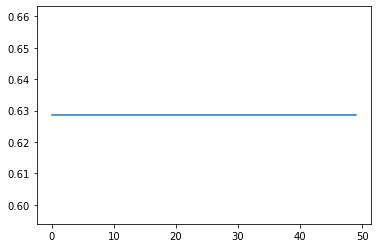

In [37]:
plt.plot(history.history['accuracy'])

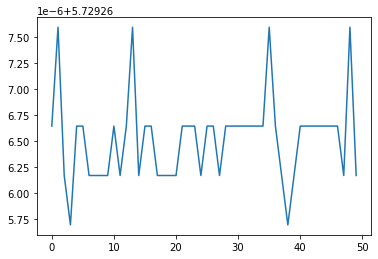

In [38]:
plt.plot(history.history['loss'])

In [39]:
class_model.evaluate(x_test,y_encoded_test, batch_size=50)

3/3 [==============================] - 0s 4ms/step - loss: 5.8182 - accuracy: 0.6228


[5.818182468414307, 0.6228070259094238]